### **References**

- [https://www.youtube.com/watch?v=5w5iUbTlpMQ](https://www.youtube.com/watch?v=5w5iUbTlpMQ)
- [https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html](https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html)
- [https://machinelearningcoban.com/2017/01/01/kmeans/](https://machinelearningcoban.com/2017/01/01/kmeans/)

### **Example**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from sklearn.datasets import make_blobs

In [53]:
ex_data = pd.DataFrame({'x': [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12],
                        'y': [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]})

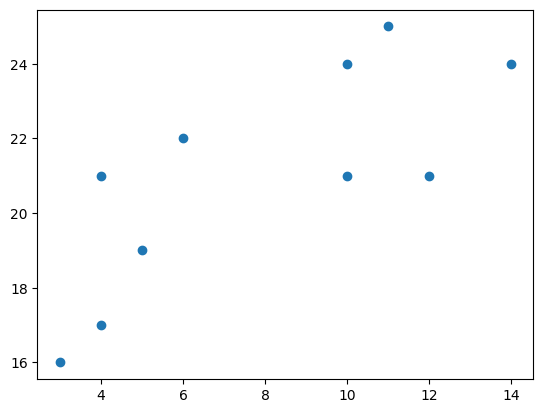

In [54]:
plt.scatter(ex_data['x'], ex_data['y'])

In [55]:
min = np.amin(ex_data)
max = np.amax(ex_data)
shape = ex_data.shape

centroids = np.random.uniform(min, max, size=(2, shape[1]))
centroids_data = pd.DataFrame({ 'x': centroids[0], 'y': centroids[1] })
print(centroids)
print(centroids_data)

[[10.80244287 14.6829943 ]
 [ 3.75909241  3.95019382]]
           x         y
0  10.802443  3.759092
1  14.682994  3.950194


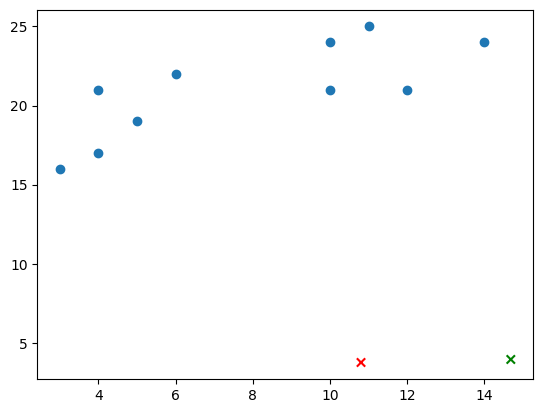

In [56]:
plt.scatter(ex_data['x'], ex_data['y'])
colors = ['r', 'g']
plt.scatter(centroids_data['x'], centroids_data['y'], c=colors, marker='x')
plt.show()

[Euclidean Distance](./mathematics/Euclidean%20Distance.md)

In [57]:
ex_data['distance_1_1st'] = ex_data.apply(lambda row: m.sqrt((centroids_data.iloc[0]['x'] - row['x'])**2 + (centroids_data.iloc[0]['y'] - row['y'])**2), axis=1)
ex_data['distance_2_1st'] = ex_data.apply(lambda row: m.sqrt((centroids_data.iloc[1]['x'] - row['x'])**2 + (centroids_data.iloc[1]['y'] - row['y'])**2), axis=1)
print(ex_data)

    x   y  distance_1_1st  distance_2_1st
0   4  21       18.534350       20.120195
1   5  19       16.308084       17.895727
2  10  24       20.256808       20.589443
3   4  17       14.886063       16.864869
4   3  16       14.516127       16.783628
5  11  25       21.241826       21.369576
6  14  24       20.491918       20.061436
7   6  22       18.862507       20.029725
8  10  21       17.259572       17.681242
9  12  21       17.282449       17.259616


In [58]:
ex_data['labels'] = ex_data.apply(lambda row: 1 if row['distance_1_1st'] < row['distance_2_1st'] else 2, axis=1)
print(ex_data)

    x   y  distance_1_1st  distance_2_1st  labels
0   4  21       18.534350       20.120195       1
1   5  19       16.308084       17.895727       1
2  10  24       20.256808       20.589443       1
3   4  17       14.886063       16.864869       1
4   3  16       14.516127       16.783628       1
5  11  25       21.241826       21.369576       1
6  14  24       20.491918       20.061436       2
7   6  22       18.862507       20.029725       1
8  10  21       17.259572       17.681242       1
9  12  21       17.282449       17.259616       2


In [61]:
centroid_1_1st = ex_data[ex_data['labels'] == 1]
centroid_2_1st = ex_data[ex_data['labels'] == 2]

    x   y  distance_1_1st  distance_2_1st  labels
0   4  21       18.534350       20.120195       1
1   5  19       16.308084       17.895727       1
2  10  24       20.256808       20.589443       1
3   4  17       14.886063       16.864869       1
4   3  16       14.516127       16.783628       1
5  11  25       21.241826       21.369576       1
7   6  22       18.862507       20.029725       1
8  10  21       17.259572       17.681242       1


In [62]:
centroids_data_new = pd.DataFrame({ 'x': [np.mean(centroid_1_1st['x']), np.mean(centroid_2_1st['x'])], 
                                 'y': [np.mean(centroid_1_1st['y']), np.mean(centroid_2_1st['y'])] })
print(centroids_data_new)

        x       y
0   6.625  20.625
1  13.000  22.500


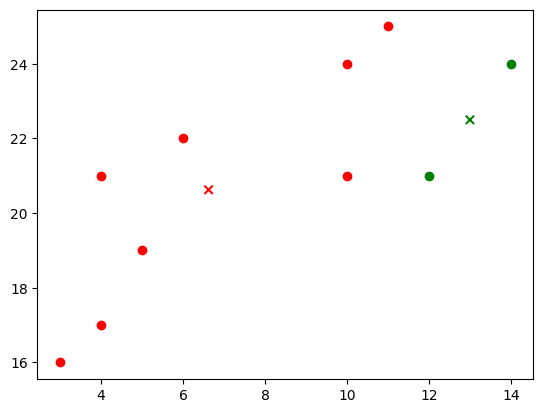

In [64]:
plt.scatter(centroid_1_1st['x'], centroid_1_1st['y'], c='r')
plt.scatter(centroid_2_1st['x'], centroid_2_1st['y'], c='g')
colors = ['r', 'g']
plt.scatter(centroids_data_new['x'], centroids_data_new['y'], c=colors, marker='x')
plt.show()

In [65]:
ex_data['distance_1_2nd'] = ex_data.apply(lambda row: m.sqrt((centroids_data_new.iloc[0]['x'] - row['x'])**2 + (centroids_data_new.iloc[0]['y'] - row['y'])**2), axis=1)
ex_data['distance_2_2nd'] = ex_data.apply(lambda row: m.sqrt((centroids_data_new.iloc[1]['x'] - row['x'])**2 + (centroids_data_new.iloc[1]['y'] - row['y'])**2), axis=1)
print(ex_data)

    x   y  distance_1_1st  distance_2_1st  labels  distance_1_2nd  \
0   4  21       18.534350       20.120195       1        2.651650   
1   5  19       16.308084       17.895727       1        2.298097   
2  10  24       20.256808       20.589443       1        4.772971   
3   4  17       14.886063       16.864869       1        4.475628   
4   3  16       14.516127       16.783628       1        5.876330   
5  11  25       21.241826       21.369576       1        6.187184   
6  14  24       20.491918       20.061436       2        8.110564   
7   6  22       18.862507       20.029725       1        1.510381   
8  10  21       17.259572       17.681242       1        3.395769   
9  12  21       17.282449       17.259616       2        5.388066   

   distance_2_2nd  
0        9.124144  
1        8.732125  
2        3.354102  
3       10.547512  
4       11.926860  
5        3.201562  
6        1.802776  
7        7.017834  
8        3.354102  
9        1.802776  


In [66]:
ex_data['labels'] = ex_data.apply(lambda row: 1 if row['distance_1_2nd'] < row['distance_2_2nd'] else 2, axis=1)
print(ex_data)

    x   y  distance_1_1st  distance_2_1st  labels  distance_1_2nd  \
0   4  21       18.534350       20.120195       1        2.651650   
1   5  19       16.308084       17.895727       1        2.298097   
2  10  24       20.256808       20.589443       2        4.772971   
3   4  17       14.886063       16.864869       1        4.475628   
4   3  16       14.516127       16.783628       1        5.876330   
5  11  25       21.241826       21.369576       2        6.187184   
6  14  24       20.491918       20.061436       2        8.110564   
7   6  22       18.862507       20.029725       1        1.510381   
8  10  21       17.259572       17.681242       2        3.395769   
9  12  21       17.282449       17.259616       2        5.388066   

   distance_2_2nd  
0        9.124144  
1        8.732125  
2        3.354102  
3       10.547512  
4       11.926860  
5        3.201562  
6        1.802776  
7        7.017834  
8        3.354102  
9        1.802776  


In [78]:
centroid_1_2nd = ex_data[ex_data['labels'] == 1]
centroid_2_2nd = ex_data[ex_data['labels'] == 2]

In [73]:
centroids_data_new = pd.DataFrame({ 'x': [np.mean(centroid_1_2nd['x']), np.mean(centroid_2_2nd['x'])], 
                                 'y': [np.mean(centroid_1_2nd['y']), np.mean(centroid_2_2nd['y'])] })
print(centroids_data_new)

      x     y
0   4.4  19.0
1  11.4  23.0


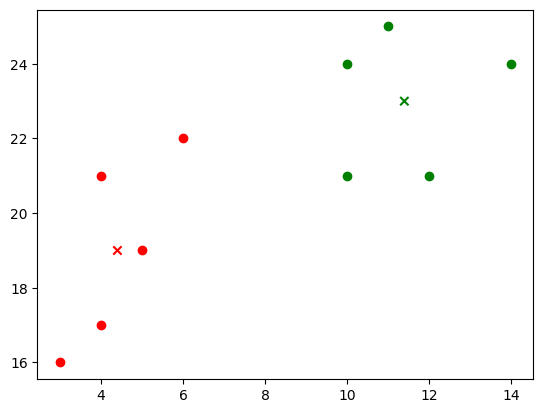

In [79]:
plt.scatter(centroid_1_2nd['x'], centroid_1_2nd['y'], c='r')
plt.scatter(centroid_2_2nd['x'], centroid_2_2nd['y'], c='g')
colors = ['r', 'g']
plt.scatter(centroids_data_new['x'], centroids_data_new['y'], c=colors, marker='x')
plt.show()